# Experiment 3 : EDA on <i><b>income-dataset.csv</b></i>

>> ### load dataset

In [12]:
import pandas as pd
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "gender",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]
df = pd.read_csv('income-dataset.csv',header=None,names = column_names)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1. What are the key attributes in the given dataset, and what types of data do they contain?

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
# Check categorical features
print(df.describe(include='object'))

       workclass education       marital_status       occupation relationship  \
count      32561     32561                32561            32561        32561   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          race gender  native_country  income  
count    32561  32561           32561   32561  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27816  21790           29170   24720  


### 2. What is the distribution of income in the dataset? (Use histograms or boxplots for visualization)

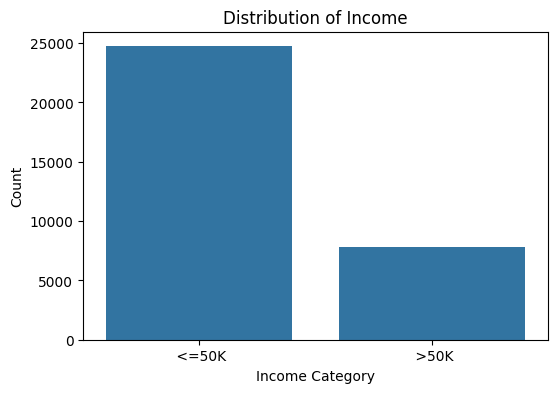

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='income', data=df)

plt.title("Distribution of Income")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.show()

### 3. Are there any missing or null values in the dataset? How would you handle them?

In [18]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

there's no null values in our dataset.<br>
Missing values in a dataset can be handled in several ways. You can remove the rows or columns if the number of missing values is small. For numerical data, missing values can be replaced with the mean or median. For categorical data, they can be filled with the most frequent value (mode). Sometimes, missing values can be replaced with a constant such as “Unknown.” In advanced cases, predictive methods like KNN imputation can be used. The method chosen depends on the amount of missing data and the type of variable.

### 4. What is the correlation between different numerical attributes? Use a heatmap to visualize this.

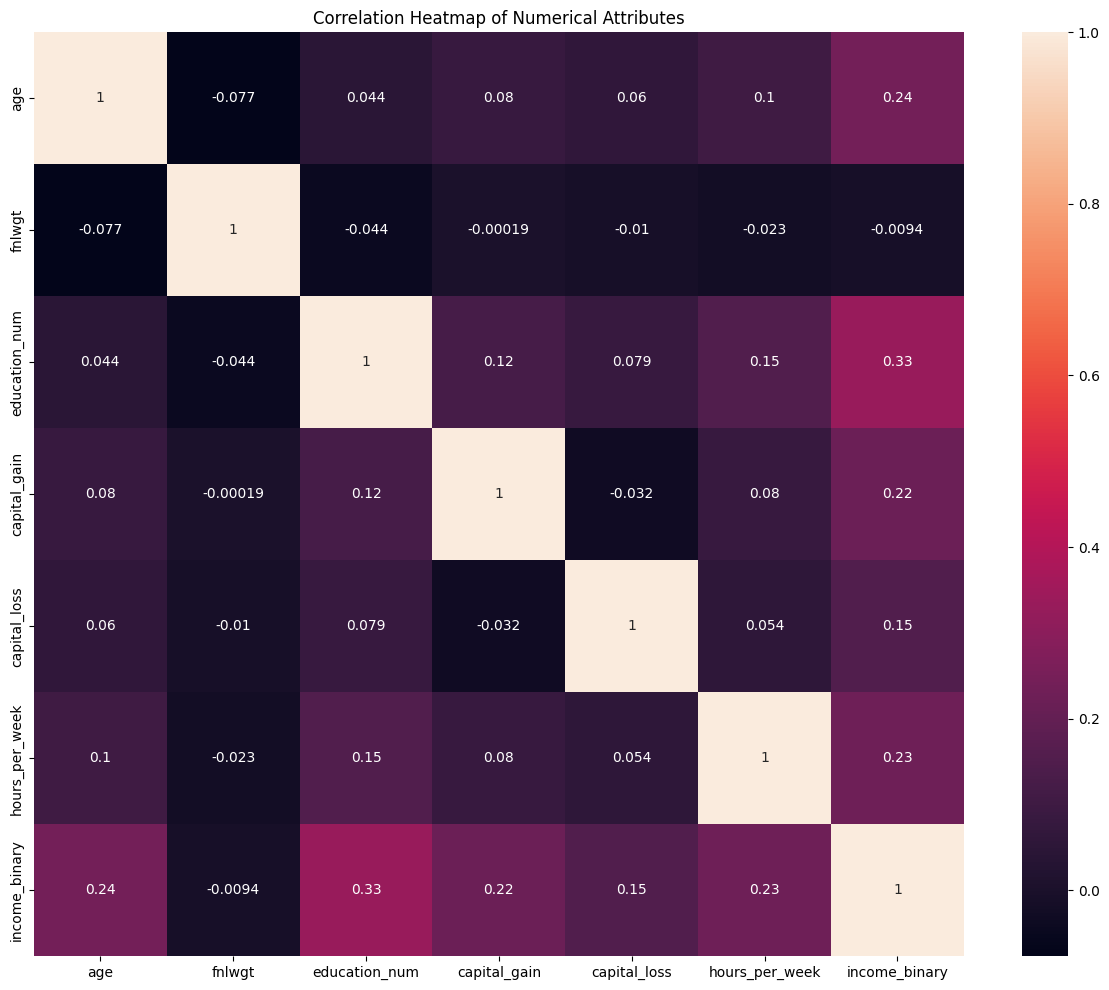

In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(15,12))
sns.heatmap(df.select_dtypes(include=['Int64']).corr(),annot=True)
plt.title("Correlation Heatmap of Numerical Attributes")
plt.show()

### 5. How does income vary with respect to age? Generate a scatter plot to analyze the relationship.

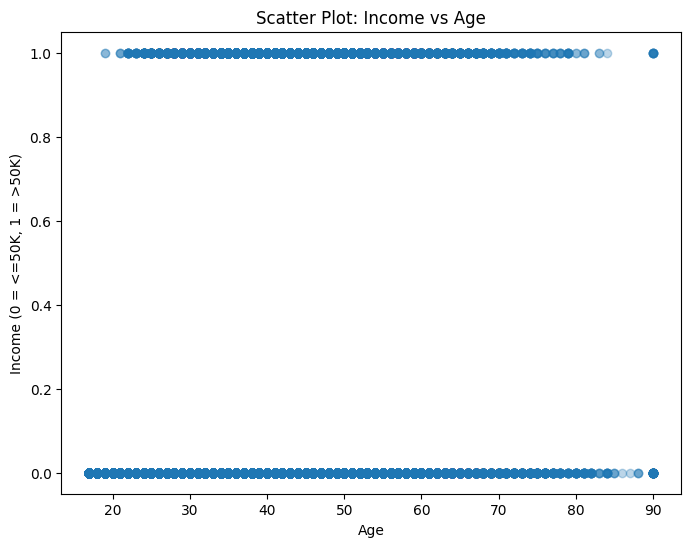

In [20]:
df['income'] = df['income'].str.strip()

# Convert income to binary
df['income_binary'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['age'], df['income_binary'], alpha=0.3)
plt.xlabel("Age")
plt.ylabel("Income (0 = <=50K, 1 = >50K)")
plt.title("Scatter Plot: Income vs Age")
plt.show()

### 6. Which profession has the highest and lowest average income? Visualize this using a bar chart.

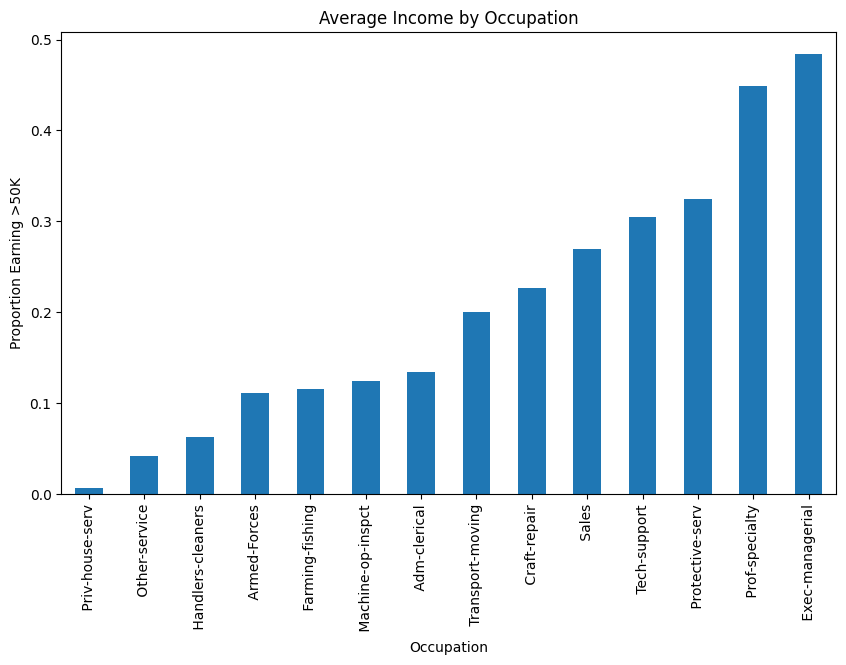

Highest Average Income Profession:  Exec-managerial
Lowest Average Income Profession:  Priv-house-serv


In [21]:
# Clean whitespace
df['income'] = df['income'].str.strip()

# Convert income to binary
df['income_binary'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Remove missing occupation values if any
df = df[df['occupation'] != ' ?']

# Calculate average income by occupation
occupation_income = df.groupby('occupation')['income_binary'].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(10,6))
occupation_income.plot(kind='bar')
plt.title("Average Income by Occupation")
plt.ylabel("Proportion Earning >50K")
plt.xlabel("Occupation")
plt.xticks(rotation=90)
plt.show()

# Print highest and lowest
print("Highest Average Income Profession:", occupation_income.idxmax())
print("Lowest Average Income Profession:", occupation_income.idxmin())

### 7. Is there any gender-based income disparity in the dataset? Use a grouped bar chart to compare.

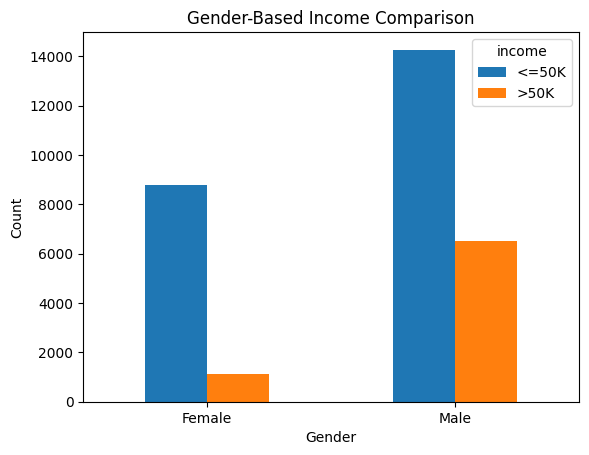

In [22]:
# Clean whitespace
df.loc[:,'income'] = df['income'].str.strip()
df.loc[:,'gender'] = df['gender'].str.strip()

# Create grouped count table
gender_income = df.groupby(['gender', 'income']).size().unstack()

# Plot grouped bar chart
gender_income.plot(kind='bar')
plt.title("Gender-Based Income Comparison")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

### 8. Can you create a pie chart showing the proportion of different education levels in the dataset?

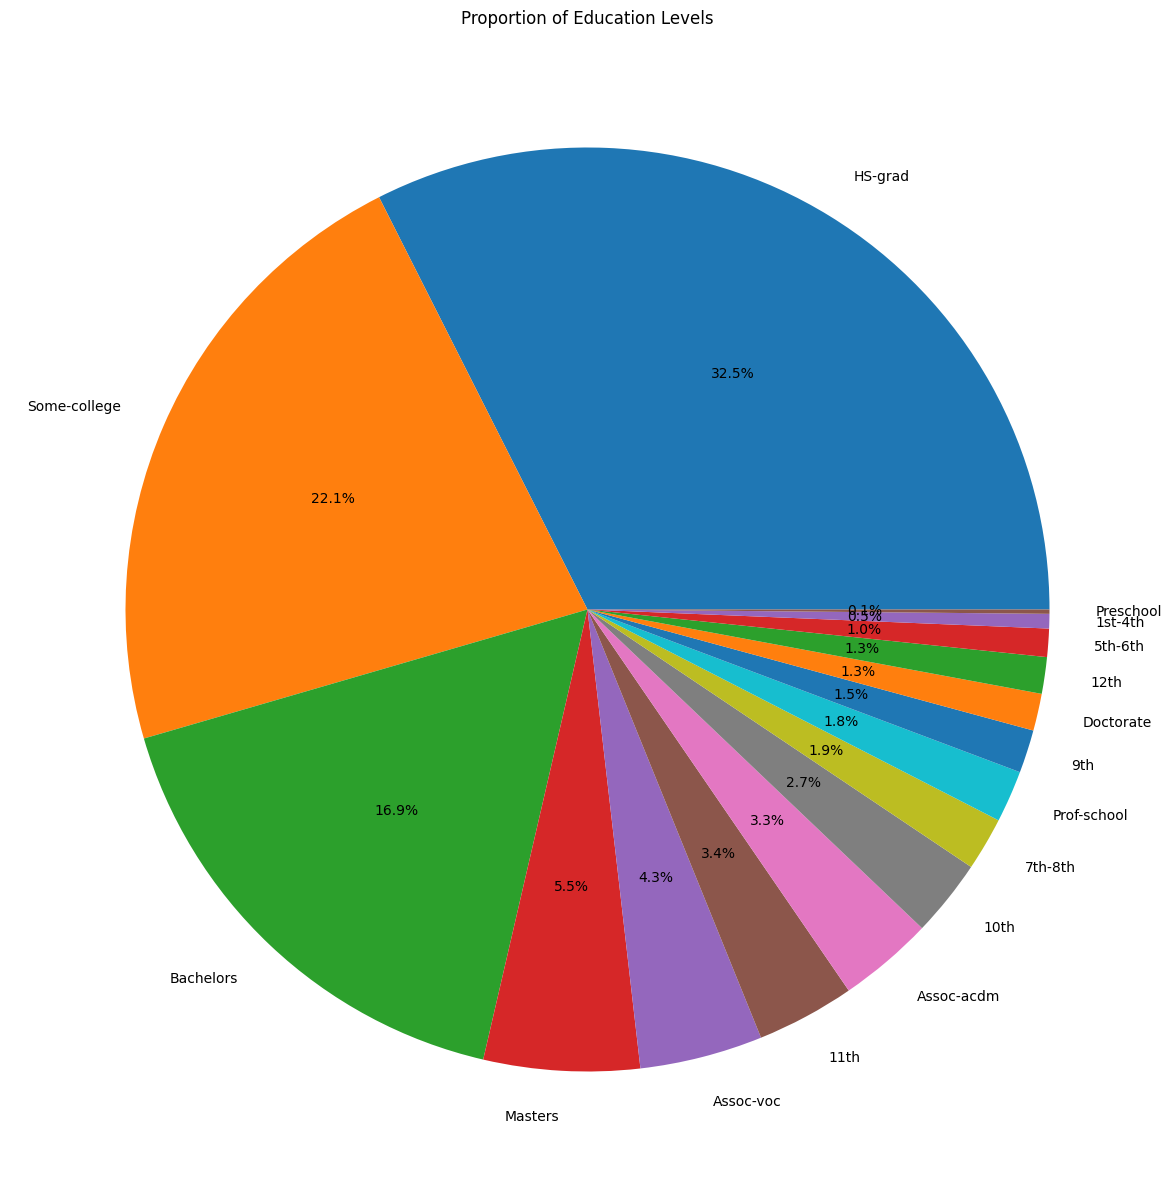

In [30]:
# Clean whitespace
df.loc[:,'education'] = df['education'].str.strip()

# Count education levels
education_counts = df['education'].value_counts()

# Plot pie chart
plt.figure(figsize=(15,15))
education_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Proportion of Education Levels")
plt.ylabel("")
plt.show()

### 9. Use a violin plot or KDE plot to analyze the spread of income based on work experience.

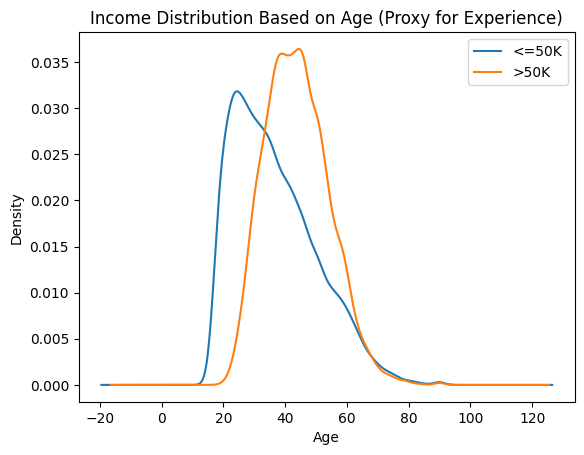

In [24]:
# Clean whitespace
df.loc[:,'income'] = df['income'].str.strip()

# Separate income groups
low_income = df[df['income'] == '<=50K']['age']
high_income = df[df['income'] == '>50K']['age']

# KDE plots
low_income.plot(kind='kde')
high_income.plot(kind='kde')

plt.legend(['<=50K', '>50K'])
plt.title("Income Distribution Based on Age (Proxy for Experience)")
plt.xlabel("Age")
plt.show()

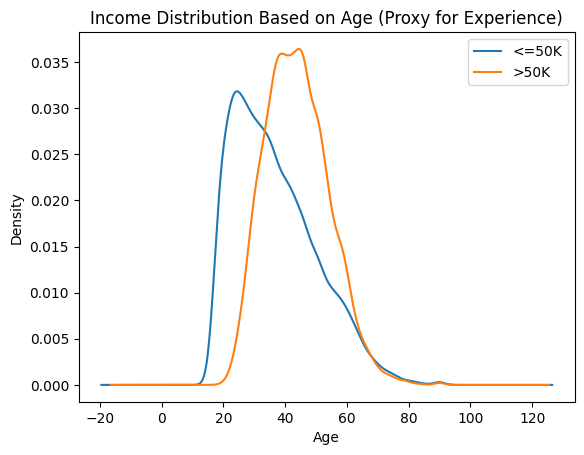

In [25]:

# Clean whitespace
df['income'] = df['income'].str.strip()

# Separate income groups
low_income = df[df['income'] == '<=50K']['age']
high_income = df[df['income'] == '>50K']['age']

# KDE plots
low_income.plot(kind='kde')
high_income.plot(kind='kde')

plt.legend(['<=50K', '>50K'])
plt.title("Income Distribution Based on Age (Proxy for Experience)")
plt.xlabel("Age")
plt.show()

### 10. Create an interactive dashboard (using tools like Tableau or Power BI) to analyze multiple variables together.